In [1]:
using Distributed
addprocs(3);

In [40]:
using LinearAlgebra, Plots
pyplot()

using Revise
using LatticeQM
using LatticeQM.Operators: graphene, valleyoperator
using LatticeQM.Operators: addinterlayerbias!, setfilling!, gethaldane, addrashba!, addzeeman!, valleyoperator, getsz

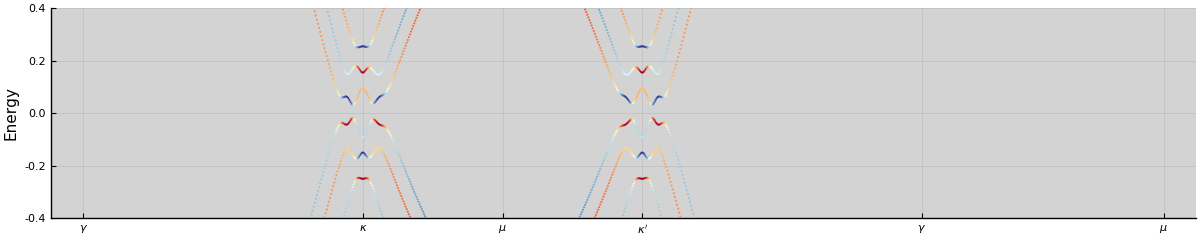

In [133]:
lat = Geometries2D.honeycomb_AA()
hops = graphene(lat; mode=:spinhalf, tz=0.2, ℓinter=0.10, ℓintra=0.10)
valley = valleyoperator(lat; spinhalf=true)
sz = getsz(lat)
# addinterlayerbias!(hops,lat,0.1)
addrashba!(hops, lat, r -> 0.1 * sign(r[3]))
addzeeman!(hops, lat, r -> 0.1 * [0.0, 0.0, sign(r[3])]);

ks = kpath(lat; num_points=1000)
bands = getbands(hops, ks, sz);
plot(bands, ylabel="\$\\varepsilon/t\$", ylim=(-0.4,0.4), size=(1200,240))

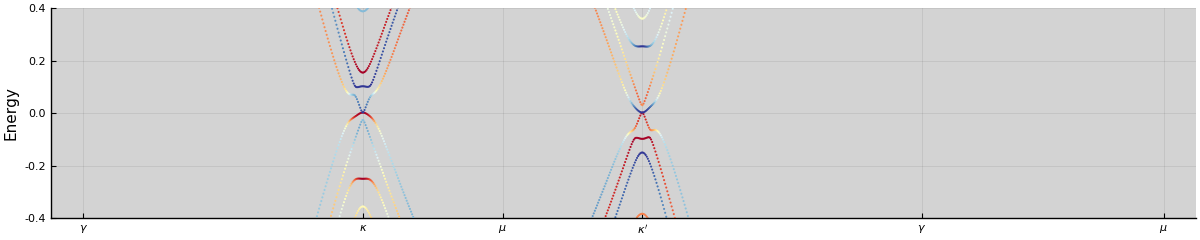

In [124]:
lat = Geometries2D.honeycomb_AB()
hops = graphene(lat; mode=:spinhalf, tz=0.20, ℓinter=0.10, ℓintra=0.10)
sz = getsz(lat)
# addinterlayerbias!(hops,lat,0.1)
addrashba!(hops, lat, r -> 0.1 * sign(r[3]))
addzeeman!(hops, lat, r -> 0.1 * [0.0, 0.0, sign(r[3])]);

ks = kpath(lat; num_points=1000)
bands = getbands(hops, ks, sz);
plot(bands, ylabel="\$\\varepsilon/t\$", ylim=(-0.4,0.4), size=(1200,240))

In [2]:
println("Generating lattice geometry...")
@time lat = Geometries2D.honeycomb_twisted(20)
nothing

Generating lattice geometry...
Twist α=1.614°   (n,m)=(20,1)
  6.365932 seconds (20.28 M allocations: 1.066 GiB, 8.04% gc time)


In [8]:
hops = graphene(lat; mode=:spinhalf, format=:sparse, tz=0.20, ℓinter=0.14, ℓintra=0.14)
@time addrashba!(hops, lat, r -> 0.25 * sign(r[3]))
addzeeman!(hops, lat, r -> 0.25 * [0.0, 0.0, sign(r[3])]);

  2.726803 seconds (1.56 M allocations: 324.297 MiB, 10.76% gc time)


In [ ]:
ks = kpath(lat; num_points=80)
bands = getbands(hops, ks; format=:sparse, num_bands=40);

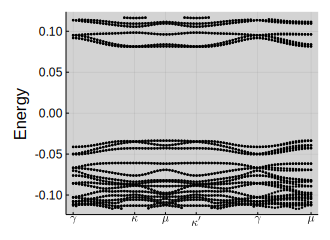

In [16]:
gr()
plot(bands, ylabel="\$\\varepsilon/t\$", size=(330,240))

In [7]:
@time (valley = valleyoperator(lat; spinhalf=false))
nothing

InterruptException: InterruptException:

In [12]:
@time setfilling!(hops, lat, 0.5+0.0/hopdim(hops); nk=9)
# addinterlayerbias!(hops, lat, 0.05)
# addhaldane!(hops, lat, 0.1; spinhalf=true, mode=:anti)
# addzeeman!(hops, lat, 0.05)
nothing

Computing bands... 100%|████████████████████████████████| Time: 0:22:31


1351.229048 seconds (5.59 k allocations: 51.765 GiB, 0.32% gc time)


Calculating bands...


Computing bands... 100%|████████████████████████████████| Time: 0:05:21


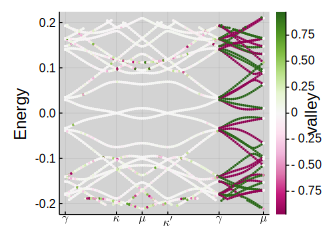

In [5]:
println("Calculating bands...")
ks = kpath(lat; num_points=100)
bands = getbands(hops, ks, valley; format=:sparse, num_bands=40)

# Show bands
# save(bands, "playground_graphene/bands.h5")
plot(bands, ylabel="\$\\varepsilon/t\$", colorbar_title="valley", size=(330,240), colorbar=true, markercolor=:PiYG)